In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [22]:
def read_and_save_asc(asc_file_path, csv_file_path):
    # Lire le fichier .ASC
    data = []
    with open(asc_file_path, 'r') as file:
        for line in file:
            # Supposons que les valeurs sont séparées par des espaces
            values = line.strip().split()
            data.append(values)
    
    # Convertir les données en DataFrame
    df = pd.DataFrame(data)
    
    # Couper les trois premières colonnes
    df = df.iloc[:, 3:]
    
    # Renommer les colonnes
    df.columns = ['temps', 'amplitude']
    
    # Sauvegarder en CSV
    df.to_csv(csv_file_path, index=False)
    print(f'Le fichier CSV a été sauvegardé sous {csv_file_path}')
    
    return df
    
def find_intervals(df):
    intervals = []
    start_index = 0
    for i in range(1, len(df)):
        if df['temps'].iloc[i] < df['temps'].iloc[i - 1]:
            intervals.append([start_index, i])
            start_index = i
    intervals.append([start_index, len(df)])
    print(intervals)
    return intervals


def create_segments(df, intervals):
    segments = [df.iloc[start_idx:end_idx] for start_idx, end_idx in intervals]
    print(f"Nombre de segments: {len(segments)}")
    for idx, segment in enumerate(segments):
        print(f"Segment {idx + 1}:\n{segment}\n")
    return segments

def calculate_intervals_and_counts(segments):
    time_intervals = []
    line_counts = []
    for segment in segments:
        start_time = float(segment['temps'].iloc[0])
        end_time = float(segment['temps'].iloc[-1])
        interval = end_time - start_time
        line_count = len(segment)
        time_intervals.append(interval)
        line_counts.append(line_count)
    
    for i, (interval, count) in enumerate(zip(time_intervals, line_counts)):
        print(f"Segment {i + 1}: Intervalle de temps = {interval:.6f} secondes, Nombre de lignes = {count}")
    
    total_intervals = len(time_intervals)
    total_lines = sum(line_counts)
    print(f"Total des segments : {total_intervals}, Total des lignes : {total_lines}")
    return time_intervals, line_counts


def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df







2A1L-ty en bas-fichier brut

In [10]:
asc_file_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut.ASC"
csv_file_path=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut.csv"
df = read_and_save_asc(asc_file_path, csv_file_path)


Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut.csv


In [14]:
df

,temps,amplitude
0,0.000000,1573.000000
1,0.000610,713.000000
2,0.001221,905.000000
3,0.001831,994.000000
4,0.002441,1033.000000
...,...,...
278523,4.996948,1246.000000
278524,4.997559,1251.000000
278525,4.998169,1284.000000
278526,4.998779,1284.000000


In [16]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528]]


In [18]:
segments = create_segments(df, intervals)


Nombre de segments: 34
Segment 1:
         temps    amplitude
0     0.000000  1573.000000
1     0.000610   713.000000
2     0.001221   905.000000
3     0.001831   994.000000
4     0.002441  1033.000000
...        ...          ...
8187  4.996948   795.000000
8188  4.997559   794.000000
8189  4.998169   795.000000
8190  4.998779   794.000000
8191  4.999390   794.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1576.000000
8193   0.000610   705.000000
8194   0.001221   900.000000
8195   0.001831   991.000000
8196   0.002441  1028.000000
...         ...          ...
16379  4.996948   912.000000
16380  4.997559   909.000000
16381  4.998169   905.000000
16382  4.998779   910.000000
16383  4.999390   910.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1573.000000
16385  0.000610   708.000000
16386  0.001221   899.000000
16387  0.001831   989.000000
16388  0.002441  1027.000000
...         ...          ...
24571

In [24]:
time_intervals, line_counts = calculate_intervals_and_counts(segments)


Segment 1: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 2: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 3: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 4: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 5: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 6: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 7: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 8: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 9: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 10: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 11: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 12: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 13: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 

In [26]:
def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df




In [28]:
# Exécution de la fonction
amplitude_df = generate_amplitude_matrix(segments)

In [40]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 25,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34
0.000000,1573.0,1576.0,1573.0,1572.0,1580.0,1587.0,1582.0,1579.0,1572.0,1575.0,...,1566.0,1573.0,1579.0,1565.0,1579.0,1585.0,1570.0,1581.0,1585.0,1586.0
0.000610,713.0,705.0,708.0,716.0,721.0,720.0,717.0,695.0,689.0,682.0,...,657.0,661.0,673.0,678.0,683.0,694.0,699.0,697.0,693.0,698.0
0.001221,905.0,900.0,899.0,911.0,912.0,915.0,910.0,892.0,885.0,878.0,...,851.0,857.0,866.0,874.0,881.0,891.0,894.0,888.0,893.0,895.0
0.001831,994.0,991.0,989.0,999.0,1001.0,1006.0,998.0,980.0,972.0,969.0,...,946.0,950.0,954.0,963.0,970.0,981.0,985.0,980.0,980.0,981.0
0.002441,1033.0,1028.0,1027.0,1037.0,1041.0,1042.0,1036.0,1020.0,1006.0,1004.0,...,979.0,986.0,996.0,1002.0,1008.0,1017.0,1022.0,1017.0,1019.0,1022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,795.0,912.0,877.0,848.0,960.0,1084.0,1121.0,1087.0,992.0,934.0,...,1054.0,1144.0,1152.0,1088.0,1082.0,1116.0,1159.0,1177.0,1230.0,1246.0
4.997559,794.0,909.0,874.0,839.0,948.0,1060.0,1124.0,1091.0,993.0,942.0,...,1052.0,1149.0,1153.0,1119.0,1034.0,1092.0,1182.0,1187.0,1245.0,1251.0
4.998169,795.0,905.0,877.0,852.0,939.0,1048.0,1148.0,1090.0,996.0,937.0,...,1070.0,1147.0,1156.0,1088.0,1043.0,1096.0,1171.0,1176.0,1261.0,1284.0
4.998779,794.0,910.0,874.0,858.0,915.0,1075.0,1126.0,1084.0,991.0,935.0,...,1063.0,1148.0,1153.0,1074.0,1057.0,1095.0,1134.0,1173.0,1260.0,1284.0


In [50]:
amplitude_df.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut matrix.csv")

In [52]:
amplitude_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8192 entries, 0.000000 to 4.999390
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Point 1   8192 non-null   float64
 1   Point 2   8192 non-null   float64
 2   Point 3   8192 non-null   float64
 3   Point 4   8192 non-null   float64
 4   Point 5   8192 non-null   float64
 5   Point 6   8192 non-null   float64
 6   Point 7   8192 non-null   float64
 7   Point 8   8192 non-null   float64
 8   Point 9   8192 non-null   float64
 9   Point 10  8192 non-null   float64
 10  Point 11  8192 non-null   float64
 11  Point 12  8192 non-null   float64
 12  Point 13  8192 non-null   float64
 13  Point 14  8192 non-null   float64
 14  Point 15  8192 non-null   float64
 15  Point 16  8192 non-null   float64
 16  Point 17  8192 non-null   float64
 17  Point 18  8192 non-null   float64
 18  Point 19  8192 non-null   float64
 19  Point 20  8192 non-null   float64
 20  Point 21  8192 non-null 

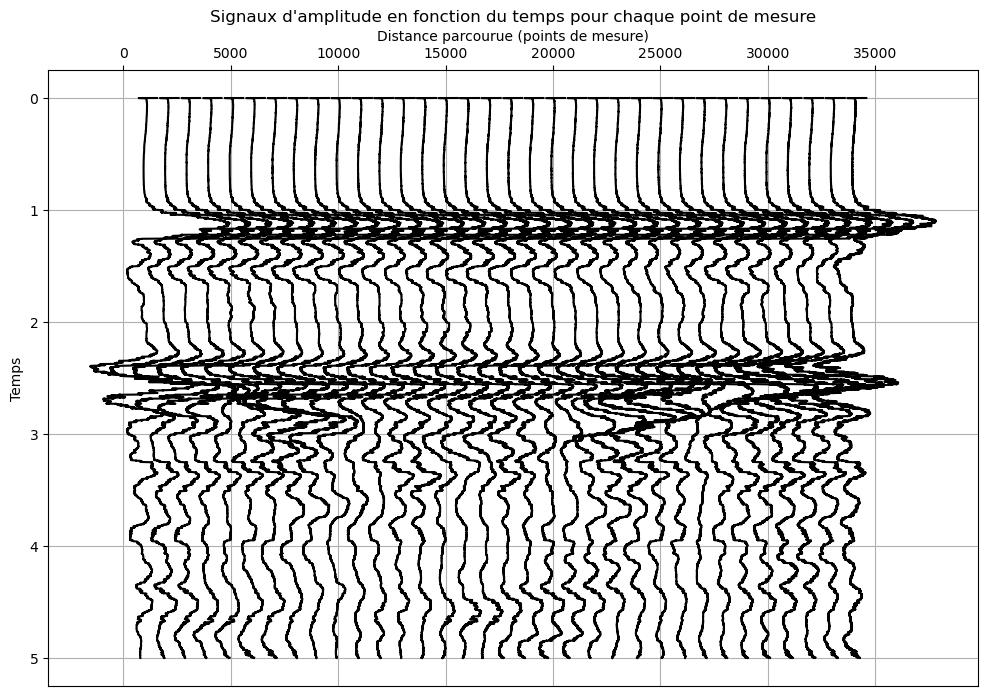

In [47]:

amplitude_matrix_path =  r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()


In [49]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_matrix_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_matrix_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_matrix_df.values, amplitude_matrix_df)



Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  3700
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [51]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut matrix modifiee.csv")

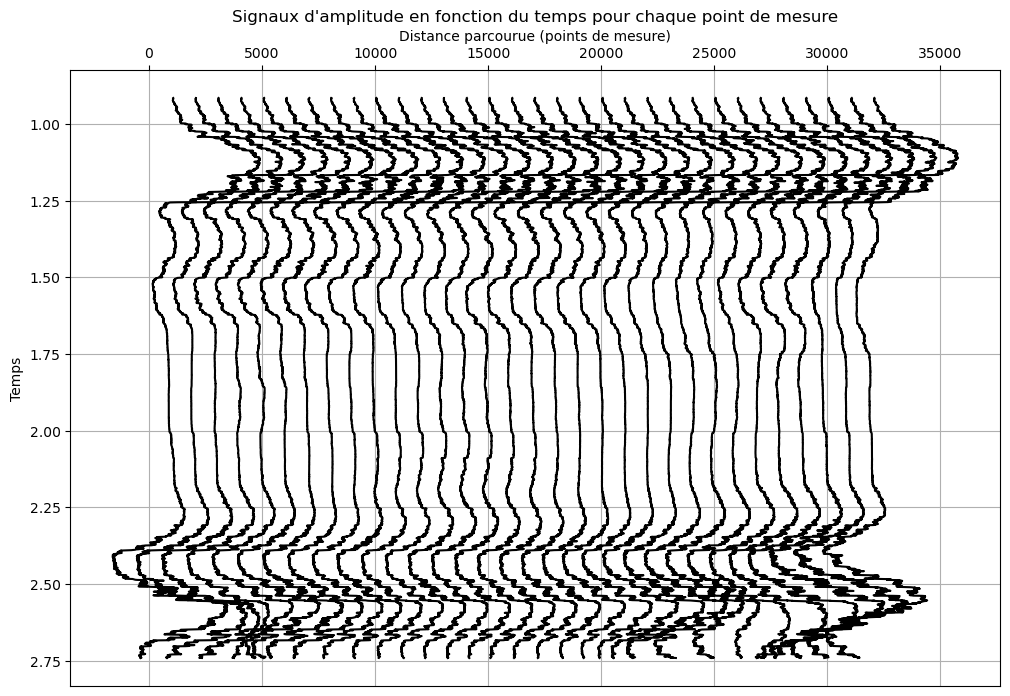

In [53]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\2A1L-ty en bas-fichier brut matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

14BL-ty en bas-fichier brut

In [93]:
asc_file_path2 = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut.ASC"
csv_file_path2=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut.csv"
df = read_and_save_asc(asc_file_path2, csv_file_path2)


Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut.csv


In [96]:
df

,temps,amplitude
0,0.000000,1336.000000
1,0.000610,719.000000
2,0.001221,865.000000
3,0.001831,952.000000
4,0.002441,988.000000
...,...,...
278523,4.996948,1091.000000
278524,4.997559,1086.000000
278525,4.998169,1107.000000
278526,4.998779,1076.000000


In [98]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528]]


In [100]:
segments = create_segments(df, intervals)


Nombre de segments: 34
Segment 1:
         temps    amplitude
0     0.000000  1336.000000
1     0.000610   719.000000
2     0.001221   865.000000
3     0.001831   952.000000
4     0.002441   988.000000
...        ...          ...
8187  4.996948  1170.000000
8188  4.997559  1175.000000
8189  4.998169  1170.000000
8190  4.998779  1164.000000
8191  4.999390  1164.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1335.000000
8193   0.000610   728.000000
8194   0.001221   873.000000
8195   0.001831   961.000000
8196   0.002441   999.000000
...         ...          ...
16379  4.996948  1070.000000
16380  4.997559  1096.000000
16381  4.998169  1091.000000
16382  4.998779  1085.000000
16383  4.999390  1085.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1337.000000
16385  0.000610   721.000000
16386  0.001221   871.000000
16387  0.001831   956.000000
16388  0.002441   991.000000
...         ...          ...
24571

In [102]:
time_intervals, line_counts = calculate_intervals_and_counts(segments)


Segment 1: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 2: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 3: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 4: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 5: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 6: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 7: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 8: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 9: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 10: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 11: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 12: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 13: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 

In [104]:
amplitude_df = generate_amplitude_matrix(segments)

In [106]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 25,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34
0.000000,1336.0,1335.0,1337.0,1338.0,1329.0,1332.0,1338.0,1342.0,1340.0,1336.0,...,1332.0,1332.0,1337.0,1318.0,1332.0,1340.0,1338.0,1339.0,1343.0,1332.0
0.000610,719.0,728.0,721.0,715.0,715.0,713.0,715.0,716.0,714.0,710.0,...,700.0,696.0,702.0,718.0,731.0,745.0,744.0,738.0,738.0,738.0
0.001221,865.0,873.0,871.0,856.0,864.0,859.0,858.0,863.0,857.0,851.0,...,844.0,837.0,842.0,864.0,875.0,891.0,883.0,878.0,886.0,882.0
0.001831,952.0,961.0,956.0,944.0,948.0,948.0,950.0,947.0,946.0,938.0,...,931.0,925.0,925.0,950.0,963.0,977.0,974.0,970.0,974.0,968.0
0.002441,988.0,999.0,991.0,983.0,976.0,976.0,980.0,983.0,978.0,976.0,...,967.0,958.0,960.0,980.0,997.0,1006.0,1016.0,1006.0,1004.0,1009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,1170.0,1070.0,1083.0,1124.0,1245.0,1318.0,1328.0,1360.0,1357.0,1362.0,...,1176.0,1029.0,947.0,929.0,928.0,1001.0,1076.0,1149.0,1106.0,1091.0
4.997559,1175.0,1096.0,1062.0,1127.0,1261.0,1289.0,1321.0,1363.0,1377.0,1360.0,...,1170.0,1023.0,936.0,937.0,941.0,993.0,1067.0,1128.0,1122.0,1086.0
4.998169,1170.0,1091.0,1071.0,1123.0,1263.0,1302.0,1349.0,1363.0,1376.0,1378.0,...,1169.0,1024.0,943.0,929.0,939.0,963.0,1060.0,1040.0,1077.0,1107.0
4.998779,1164.0,1085.0,1078.0,1146.0,1252.0,1298.0,1326.0,1374.0,1374.0,1356.0,...,1172.0,1028.0,914.0,918.0,954.0,999.0,1096.0,1143.0,1140.0,1076.0


In [108]:
amplitude_df.to_csv( r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut matrix.csv")

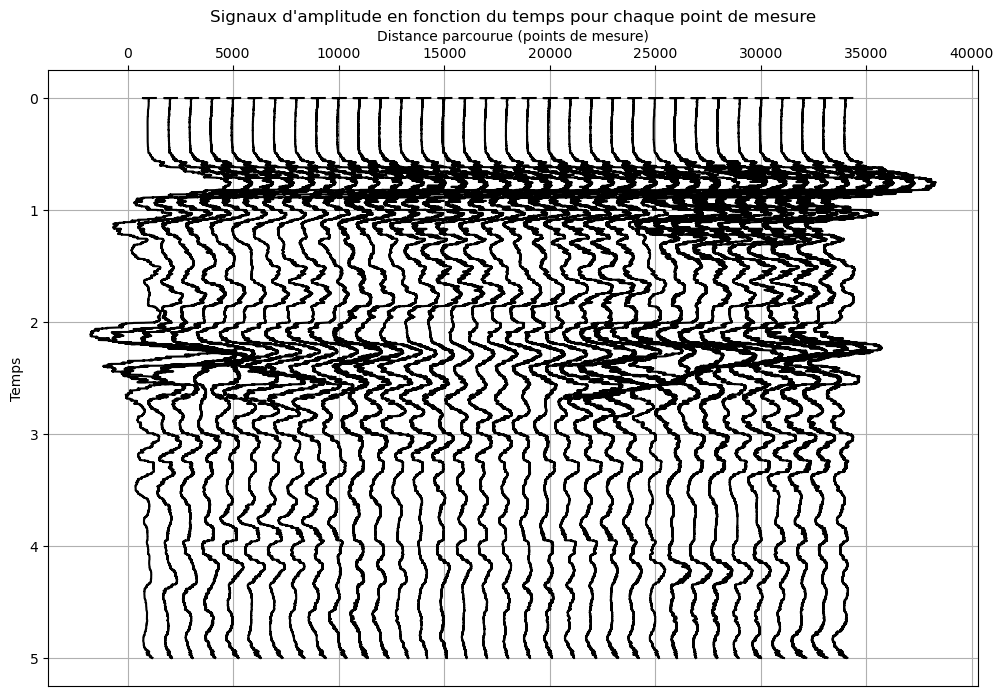

In [55]:
amplitude_matrix_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [57]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_matrix_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_matrix_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_matrix_df.values, amplitude_matrix_df)

Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  3700
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [59]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut matrix modifiee.csv")

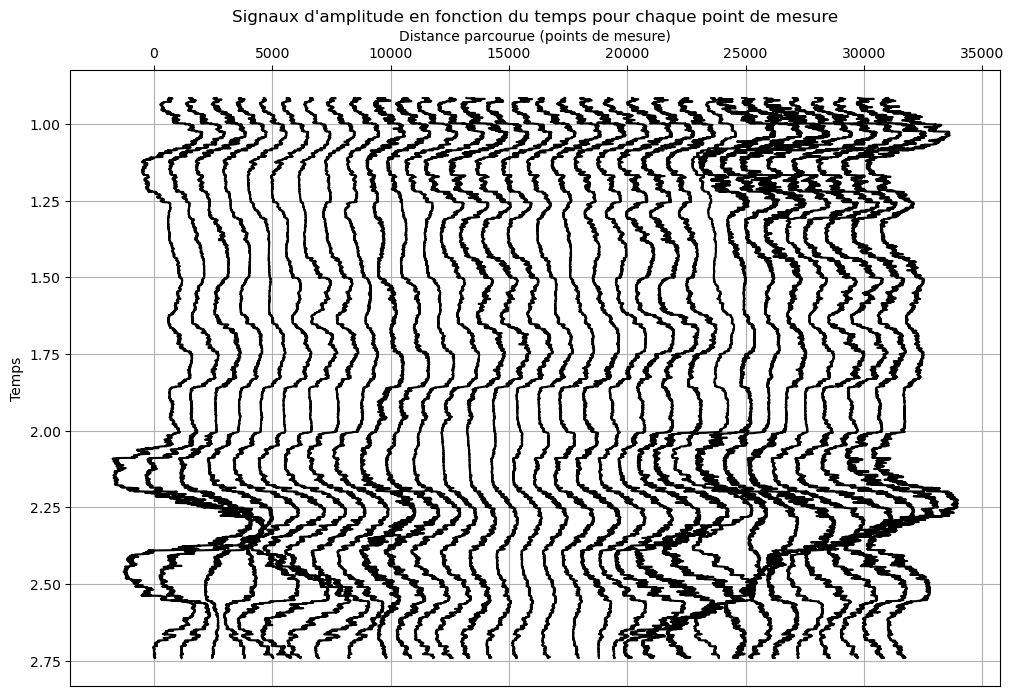

In [61]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\1er essai- petit bac et petit tuyau en bas\14BL-ty en bas-fichier brut matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()